## The WordCloud function

The WordCloud function from wordcloud allows creating word clouds in Python. The function provides several methods, but generate is the one you need to create a word cloud from a text string. Note that by default, the image size is 400x200 but you can customize the size with width and height, as in the example below or using scale (defaults to 1), which is recommended for large word clouds.

It is worth to mention that if you want words to be repeated set repeat = True. This is very useful for creating a word cloud from a single word or small texts.

In [3]:
# %pip install wordcloud

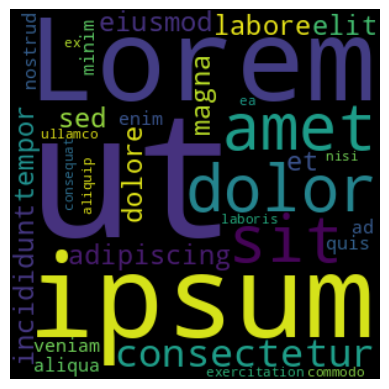

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300).generate(text)

# Remove the axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show() 


Background color

The background_color argument can be used to override the default black color of the word cloud image.

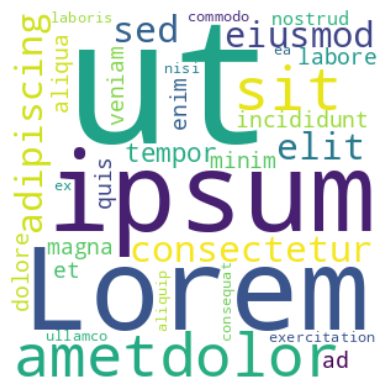

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300, background_color = "white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Color map

By using colormap you can customize the color palette used to draw the colors for each word. These colors are randomly selected from the color map.

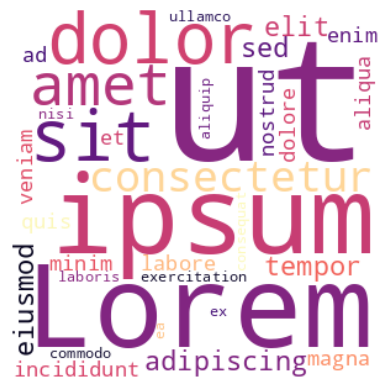

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300, background_color = "white",
               colormap = "magma")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Font size

The WordCloud function provides the min_font_size (default: 4) and max_font_size (default: None) arguments which are the smallest and largest font size to use within the word cloud.

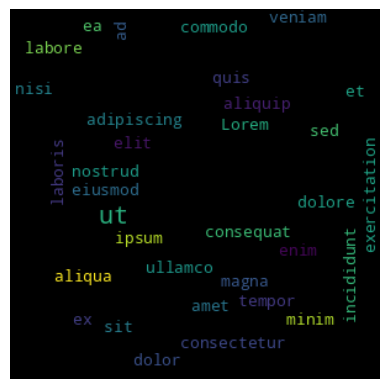

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300,
               max_font_size = 20, min_font_size = 10)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Maximum number of words

By default, the word cloud will try to fit up to 200 words, but you can decrease the number of words with max_words. In the following example we are setting the maximum number of words to five.

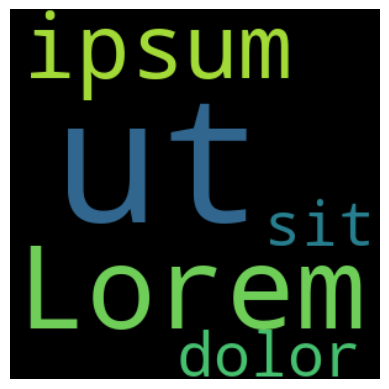

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300,
               max_words = 5)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Stopwords

Stop words are the words that will be eliminated from the word cloud image. By default the function takes into account a predefined list of stop words, but you can set your own with stopwords.

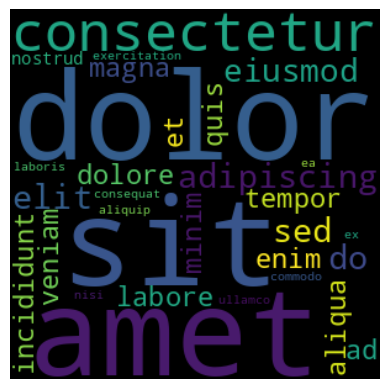

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300,
               stopwords = ["Lorem", "ipsum", "ut"])
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Including numbers

Python word clouds doesn’t include numbers by default, but setting include_numbers = True will add them.

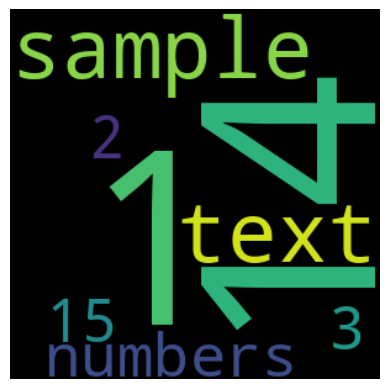

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "This is a sample text with some numbers: 1, 2, 3, 1, 14, 15, 14"

wc = WordCloud(width = 300, height = 300, include_numbers = True)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


### Masked wordcloud in Python


You can mask a shape or an image on where to draw word to a Python word cloud with mask. Note that if mask is not None, width and height will be ignored. In the following example we are creating a circle and using it to create a wordcloud with a circular shape.

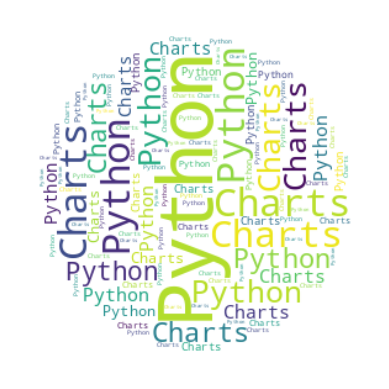

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Python Charts"

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color = "white", repeat = True, mask = mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 
 
 
 


Mask image

You can also load an image and use it as mask. In this scenario, all white entries (#FFFFFF) will be considered “masked out” while the others will be used to draw the word cloud. We will be using this image in the following two examples.

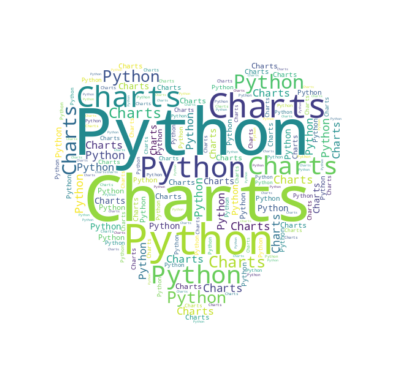

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from io import BytesIO
import requests

text = "Python Charts"

# From URL
response = requests.get("https://raw.githubusercontent.com/R-CoderDotCom/samples/main/wordcloud-mask.jpg")
mask = np.array(Image.open(BytesIO(response.content)))

# From local
# mask = np.array(Image.open("file_name.png"))

wc = WordCloud(background_color = "white", repeat = True, mask = mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show()

Color from image

It is possible to use the colors from the image to set the colors of the word cloud. You will need to generate the colors from the image with ImageColorGenerator and use the recolor function, as in the example below.

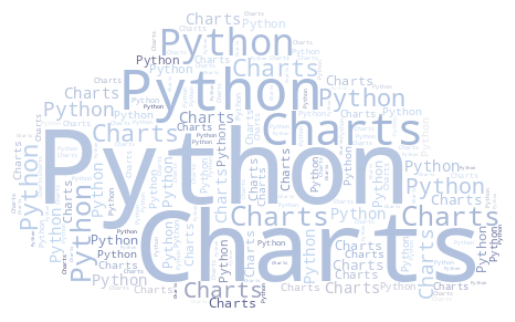

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests

text = "Python Charts"

# From URL
response = requests.get("https://365psd.com/images/istock/previews/1004/100424327-vector-cloud-icon.jpg")
mask = np.array(Image.open(BytesIO(response.content)))

# Colors
image_colors = ImageColorGenerator(mask)

wc = WordCloud(background_color = "white", repeat = True, mask = mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc.recolor(color_func=image_colors), interpolation = "bilinear")

plt.show() 
 
 


Contour color and width

Finally, if you used a mask you can also set a contour or border with contour_width. The color of the contour can be customized with contour_color.

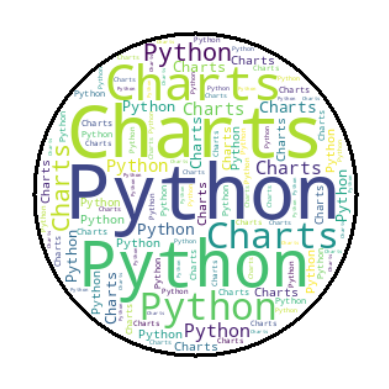

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Python Charts"

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(height = 500, width = 500, background_color = "white",
               repeat = True, mask = mask,
               contour_width = 3, contour_color = "black")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show() 
